In [66]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
path_list=["res/2022-05-10 10:22:03.json","res/inner_8dim_pls2022-05-19 09:25:02.json"]# xdim=8, depth=3 many trials
#path_list=["res/2022-05-11 17:23:53.json","res/inner_4dim_pls2022-05-19 09:25:26.json"] # xdim=4, qubit=8, depth=3, many trials
path_list=["res/extra_8dim_2022-05-18 15:09:00.json","res/extra_8dim_pls2022-05-19 09:24:37.json"] # xdim=8, qubit=8, depth=3, extra

res_dict={}
for path in path_list:
    with open(path,"r") as f:
        json_str=f.read()

    temp_dict=json.loads(json_str)
    res_dict.update(temp_dict)

In [68]:

res_df=pd.DataFrame.from_dict(res_dict).T
#mean_df=res_df.groupby("Model").mean()
#std_df=res_df.groupby("Model").std()
res_df.groupby("Model").mean()

/tmp/ipykernel_16034/3250594689.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  res_df.groupby("Model").mean()


,Train,Test,Records
Model,,,
BYR,0.002150,5.837400e-01,26.807302
BYR-8-dim,0.030909,7.853261e-01,26.807302
PLS,0.000875,1.289155e+00,26.807302
PLS-8-dim,0.019656,1.425350e+09,26.807302
QCL-8-dim,0.010684,6.814618e-01,26.807302
RFR,0.029049,7.275615e-01,26.807302
RFR-8-dim,0.033663,8.293800e-01,26.807302
SVR,0.014863,7.409291e-01,26.807302
SVR-8-dim,0.017428,8.355656e-01,26.807302


In [69]:
db_list=list(set(res_df["Database"]))
db_list

['MP', 'Solv', 'ESOL', 'Lipo']

In [70]:
"""
for db_name in db_list:
    sel_df=res_df[res_df["Database"]==db_name]
    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]
    plt.figure()
    sns.lineplot(data=sel_df,x="Records",y="Test",hue="Model",ci=None)
    plt.title(db_name)
    plt.figure()
    sns.lineplot(data=dim_df,x="Records",y="Test",hue="Model",ci=None)
    plt.title(db_name)
"""


'\nfor db_name in db_list:\n    sel_df=res_df[res_df["Database"]==db_name]\n    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]\n    plt.figure()\n    sns.lineplot(data=sel_df,x="Records",y="Test",hue="Model",ci=None)\n    plt.title(db_name)\n    plt.figure()\n    sns.lineplot(data=dim_df,x="Records",y="Test",hue="Model",ci=None)\n    plt.title(db_name)\n'

In [71]:
"""
for db_name in db_list:
    sel_df=res_df[res_df["Database"]==db_name]
    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]
    plt.figure()
    sns.boxplot(data=sel_df,x="Records",y="Test",hue="Model")
    plt.title(db_name)
    plt.figure()
    sns.boxplot(data=dim_df,x="Records",y="Test",hue="Model")
    plt.title(db_name)

"""

'\nfor db_name in db_list:\n    sel_df=res_df[res_df["Database"]==db_name]\n    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]\n    plt.figure()\n    sns.boxplot(data=sel_df,x="Records",y="Test",hue="Model")\n    plt.title(db_name)\n    plt.figure()\n    sns.boxplot(data=dim_df,x="Records",y="Test",hue="Model")\n    plt.title(db_name)\n\n'

In [72]:
#sel_df.groupby("Model").median()

In [73]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

def swam_plot(sel_df,db_name):

    n_record_list=sorted(list(set(sel_df["Records"])))

    fig = plt.figure(figsize=(12,2),dpi=100)
    #plt.title(db_name)
    plt.subplots_adjust(wspace=0.5, hspace=0.6)
    for i in range(len(n_record_list)):
        ax = fig.add_subplot(1, len(n_record_list), i+1)

        target_record_df=sel_df[sel_df["Records"]==n_record_list[i]]
        sns.boxplot(data=target_record_df,x="Records",y="Test",hue="Model",ax=ax)
        y_lim=list(ax.get_ylim())
        y_lim[1]=min(4,y_lim[1])
        y_lim[0]=max(0,y_lim[0])
        ax.set_ylim(*y_lim)
        plt.legend([],[], frameon=False)
        ax.set_xlabel("")
        if i==0:
            ax.set_ylabel("MSE")
            ax.set_title(db_name)
        else:
            ax.set_ylabel("")

        if i==len(n_record_list)-1:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

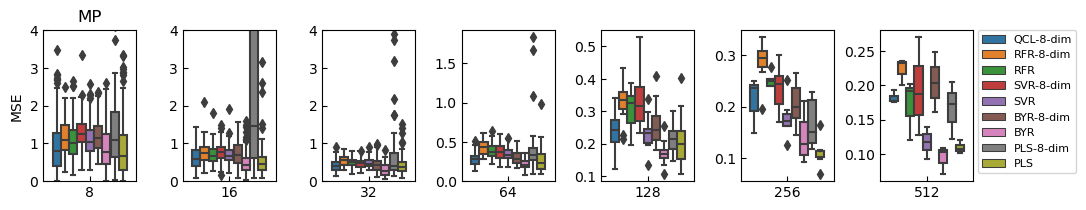

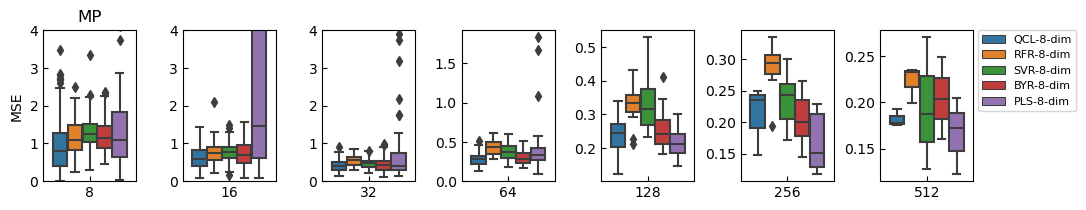

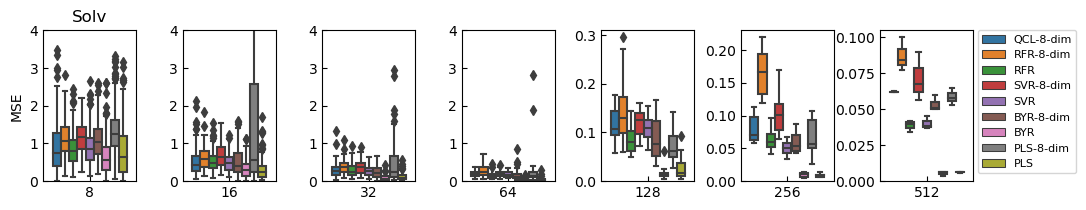

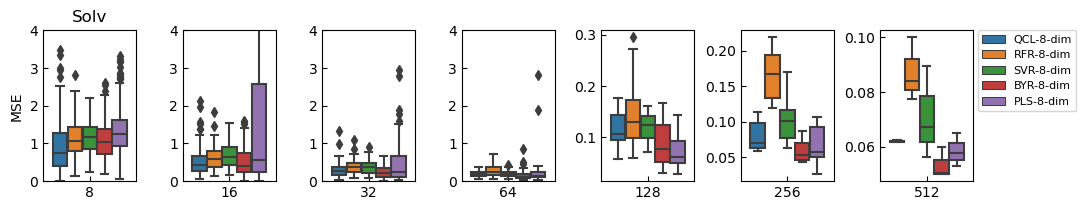

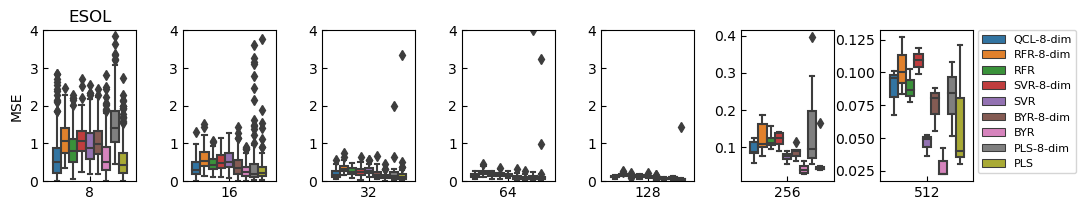

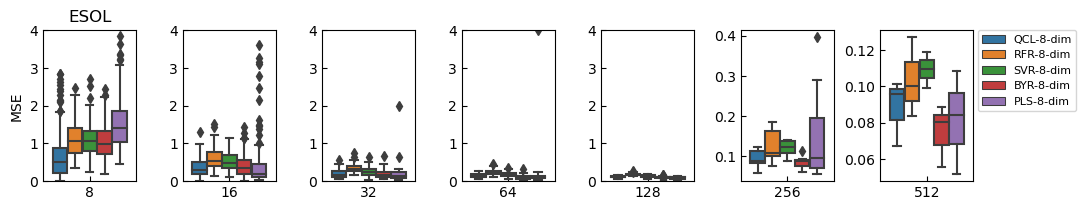

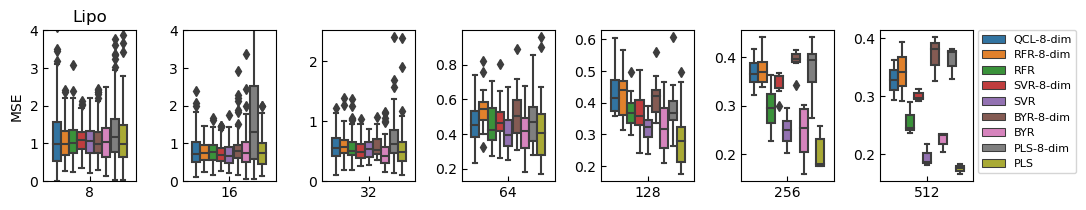

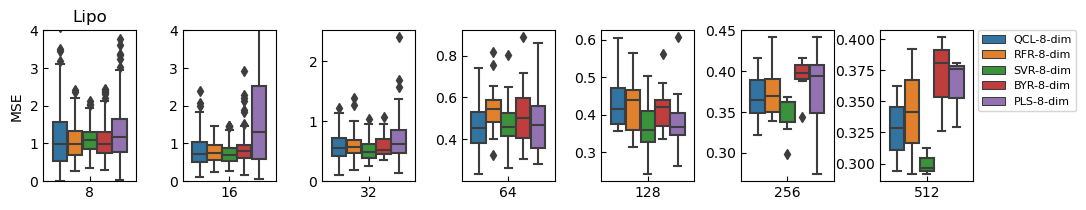

In [74]:

for db_name in db_list:
    sel_df=res_df[res_df["Database"]==db_name]
    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]
    swam_plot(sel_df,db_name)
    swam_plot(dim_df,db_name)

MP


BYR-8-dim    2.714286
PLS-8-dim    2.142857
QCL-8-dim    1.714286
RFR-8-dim    4.428571
SVR-8-dim    4.000000
dtype: float64

Solv


BYR-8-dim    1.285714
PLS-8-dim    2.428571
QCL-8-dim    2.571429
RFR-8-dim    4.571429
SVR-8-dim    4.142857
dtype: float64

ESOL


BYR-8-dim    2.000000
PLS-8-dim    2.000000
QCL-8-dim    2.285714
RFR-8-dim    4.428571
SVR-8-dim    4.285714
dtype: float64

Lipo


BYR-8-dim    3.571429
PLS-8-dim    4.000000
QCL-8-dim    2.142857
RFR-8-dim    3.714286
SVR-8-dim    1.571429
dtype: float64

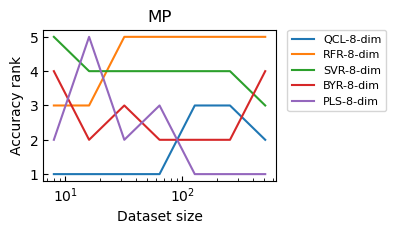

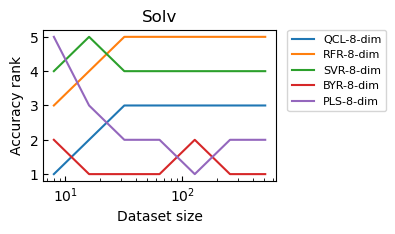

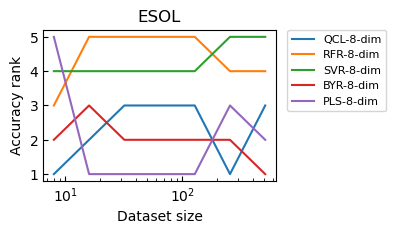

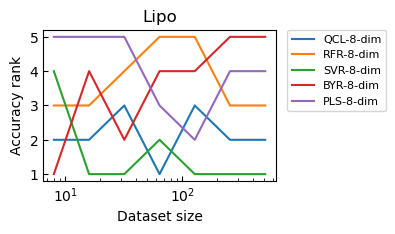

In [75]:

from matplotlib.ticker import MultipleLocator
for db_name in db_list:
    
    rank_dict={}
    sel_df=res_df[res_df["Database"]==db_name]
    sel_df=sel_df[sel_df["Model"].str.find("dim")>0]

    n_record_list=sorted(list(set(sel_df["Records"])))
    for i in range(len(n_record_list)):
        target_record_df=sel_df[sel_df["Records"]==n_record_list[i]]

        median_df=target_record_df.groupby("Model")["Test"].median()
        temp_dict=median_df.rank().to_dict()
        rank_dict[n_record_list[i]]=temp_dict


    rank_df=pd.DataFrame.from_dict(rank_dict)
    print(db_name) 
    display(rank_df.T.mean())
    temp_df=rank_df.T.reset_index()
    temp_df=temp_df.astype(int)

    plt.figure(figsize=(3,2),dpi=100)
    #for col in temp_df.columns:
    for col in [ 'QCL-4-dim', 'RFR-4-dim', 'SVR-4-dim','BYR-4-dim' ,'QCL-8-dim', 'RFR-8-dim', 'SVR-8-dim','BYR-8-dim',"PLS-4-dim","PLS-8-dim"]:
    #for col in [ 'QCL-4-dim', 'RFR-4-dim', 'SVR-4-dim','BYR-4-dim' ]:
    #for col in [ 'QCL-8-dim', 'RFR-8-dim', 'SVR-8-dim','BYR-8-dim' ]:
        try:
            sns.lineplot(data=temp_df,x="index",y=col,label=col)
        except:
            pass

    plt.title(db_name)
    plt.xlabel("Dataset size")
    plt.xscale("log")
    plt.ylabel("Accuracy rank")
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(1)) 
    #plt.xticks([8,64,128,256,512])
    plt.yticks([1,2,3,4,5])

    #plt.ylim(4,1)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)